# INTRODUCTION

Income inequality has emerged as a pressing concern, particularly in developing nations, where uneven income distribution presents a significant societal challenge. The advent of rapid advancements in AI and automation has amplified this issue, signaling a potential escalation unless proactive measures are implemented. In response to this escalating problem, the primary objective of this project is to develop a robust machine learning model capable of predicting whether an individual's income falls above or below a specified threshold. The intent is not solely confined to predictive capabilities but extends to the potential socio-economic impact. By leveraging such a predictive model, the aim is to streamline and enhance the accuracy of monitoring critical population indicators, specifically income levels, bridging gaps between census intervals. The envisaged outcome aims to furnish policymakers with invaluable insights and tools to mitigate and navigate global income inequality more effectively.

# BUSINESS UNDERSTANDING

The pursuit of creating a predictive machine learning model holds immense promise in combatting the pervasive issue of income inequality. Beyond the technical ambition, the endeavor aligns with a broader strategic goal: to furnish policymakers with a potent toolset capable of fostering more effective decision-making. By accurately predicting income thresholds for individuals, this model transcends mere data analytics, contributing to the proactive management and eventual reduction of income inequality globally.

This approach represents a crucial step towards bridging socio-economic disparities, offering a means to actively address income inequality concerns on a macroeconomic scale. The envisioned impact extends beyond predictive accuracy; it encompasses the potential to empower policymakers with actionable insights crucial in designing targeted interventions aimed at alleviating income inequality.

In [ ]:
# Install Libraries
!pip install scikit-learn optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.0 MB/s eta 0:00:00


In [ ]:
# Importation
import os

# Data manipulation
import numpy as np
import pandas as pd


# Machine Learning
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


# Google drive
from google.colab import drive

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Class imbalance

# Hypothesis testing
from scipy.stats import chi2_contingency


In [ ]:
# Mount drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
# Navigate to myDrive/DAP Capstone/Data
%cd '/content/drive/MyDrive/Colab Notebooks/DAP Capstone/data'

/content/drive/MyDrive/Colab Notebooks/DAP Capstone/data


In [ ]:
# Data Loading
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DAP Capstone/data/Train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DAP Capstone/data/Test.csv')
variable_definitions = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DAP Capstone/data/VariableDefinitions.csv')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train.head()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,...,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit


In [ ]:
train.tail()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
209494,ID_TZ99995,16,Female,7th and 8th grade,NaN,High school,Never married,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,2170.60,Below limit
209495,ID_TZ99996,78,Male,Bachelors degree(BA AB BS),NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,Canada,?,?,?,?,NaN,NaN,NaN,1029.57,Below limit
209496,ID_TZ99997,8,Female,Children,NaN,NaN,Never married,White,All other,Children or Armed Forces,...,US,?,?,?,?,NaN,NaN,NaN,791.61,Below limit
209497,ID_TZ99998,26,Female,Some college but no degree,Private,NaN,Married-civilian spouse present,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,3530.26,Below limit
209498,ID_TZ99999,19,Male,11th grade,Local government,High school,Never married,Black,All other,Children or Armed Forces,...,US,MSA to MSA,Same,Same county,Same county,No,South,Florida,1987.72,Below limit


In [ ]:
train.shape

(209499, 43)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     209499 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

In [ ]:
train.isnull().sum()

ID                                     0
age                                    0
gender                                 0
education                              0
class                             105245
education_institute               196197
marital_status                         0
race                                   0
is_hispanic                            0
employment_commitment                  0
unemployment_reason               202979
employment_stat                        0
wage_per_hour                          0
is_labor_union                    189420
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main              105694
total_employed                         0
household_stat                         0
household_summary                      0
under_18_family                   151654
veterans_admin_questionnaire      207415
vet_benefit     

In [ ]:
train.duplicated().sum()

0

# DATA UNDERSTANDING

The dataset consists of 209,499 entries with 43 columns encompassing various demographic, employment, and socio-economic attributes. Key observations from the data overview reveal varying degrees of completeness among columns, indicated by the counts of non-null values:

- **Demographic Information**: The dataset includes essential demographic details such as 'age' and 'gender', both entirely populated with non-null values.
- **Education and Employment**: Columns like 'education' and 'employment_commitment' show complete data, while 'class' and 'education_institute' display notable instances of missing values, with 'education_institute' having only 13,302 non-null entries.
- **Marital and Household Details**: Attributes such as 'marital_status' and 'household_summary' exhibit complete data, whereas 'under_18_family' and 'veterans_admin_questionnaire' have substantial missing values, with 'veterans_admin_questionnaire' having only 2,084 non-null entries.
- **Income and Taxation**: The 'income_above_limit' column serves as the target variable for prediction and appears complete, indicating whether an individual's income falls above or below a certain threshold. The 'tax_status' column, a potential predictor, contains complete data.
- **Geographical and Migration Details**: Columns related to migration and residence display a mix of complete and partially complete data. For instance, 'migration_prev_sunbelt' and 'old_residence_state' exhibit significant missing values, with approximately 121,047 and 16,351 non-null entries, respectively.
- **Financial Information**: Attributes like 'gains', 'losses', and 'stocks_status' exhibit complete data.
  
The dataset offers a diverse range of socio-economic attributes, but careful consideration and handling of missing values will be imperative for columns with substantial missing data percentages, impacting the robustness of subsequent analyses and model development. Further exploration, imputation strategies, or selective exclusion may be necessary to address the missing data, ensuring the integrity of analyses and predictive modeling for income classification.

In [ ]:
# Define a function to calculate the percentage of missing values for each column and also a plot
def calculate_missing_percentage(df:pd.DataFrame):
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    missing_df = pd.DataFrame({
        'Column': missing_values.index,
        '% of Missing Values': missing_percentage.values
    })
    missing_df = missing_df[missing_df['% of Missing Values'] > 0]
    return missing_df

# Plot missing values
def plot_percentage_missing(missing_df:pd.DataFrame):
  missing_df = missing_df.sort_values(by='% of Missing Values', ascending=False)
  fig = px.bar(
    missing_df,
    x='Column',
    y='% of Missing Values',
    text='% of Missing Values',
    range_y=[0, 110],
    labels={'% of Missing Values': '% of Missing Values', 'Column': 'Column'}
    )
  fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
  fig.update_layout(
    title='Percentage of Missing Values in Columns',
    xaxis_title='Column',
    yaxis_title='% of Missing Values',
    )
  fig.show()

In [ ]:
# Apply the function on the train set
plot_percentage_missing(calculate_missing_percentage(train))

The bar plot visualizes the percentage of missing values across various columns in the train dataset. Each bar in the plot displays the percentage of missing values within that column. The graph reveals considerable variations in the completeness of data across different attributes, with certain columns exhibiting significantly high percentages of missing values, notably 'veterans_admin_questionnaire', 'unemployment_reason', 'education_institute', 'old_residence_reg', and 'old_residence_state', all exceeding 90% missing data. Conversely, columns such as 'migration_code_change_in_msa', 'migration_code_move_within_reg', 'migration_code_change_in_reg', and 'class' demonstrate lower percentages, indicating comparatively more complete data. This visualization provides a clear overview of the data completeness per column, underscoring columns that might require thorough handling of missing values before analysis and those with relatively intact data, guiding potential strategies for data imputation or exclusion in subsequent analyses.

In [ ]:
# Apply the function on the test set
plot_percentage_missing(calculate_missing_percentage(test))

The bar plot illustrates the percentage of missing values in the test set. Each bar displays the percentage of missing values for the column. Notably, several columns exhibit substantial percentages of missing data, notably 'unemployment_reason', 'education_institute', 'veterans_admin_questionnaire', 'old_residence_reg', and 'old_residence_state', all surpassing 90% missing values. Conversely, 'migration_code_change_in_msa', 'migration_code_move_within_reg', 'migration_code_change_in_reg', and 'class' demonstrate lower percentages of missing data. This visualization emphasizes the varying degrees of data completeness across these columns, highlighting columns with extensive missing data that may necessitate careful handling, such as imputation strategies or potential exclusion, to ensure robust analyses while identifying columns with relatively higher data completeness for more reliable insights.

# HYPOTHESIS

**Null Hypothesis (H0):** There is no association between education and income levels.

**Alternate Hypothesis (H1):** There is an association between education and income levels.

# ANALYTICAL QUESTIONS

1. What is the distribution of ages in the dataset?

2. How is the dataset distributed among different genders?

4. What is the distribution of education levels in the dataset?

5. How is the dataset distributed among different tax filer statuses?

6. What is the distribution of individuals above and below the income limit?

7. How does the marital status of individuals correlate with their income, and are there specific status categories that indicate higher or lower income brackets?

8. Is there a notable difference in income between genders, and how has this trend evolved over the years?

9. Among different races or ethnicities, what are the disparities in income distribution, and are there any specific groups that stand out in terms of higher or lower income levels?


# HYPOTHEIS TESTING

## RATIONALE
The rationale behind this hypothesis stems from the widely held belief and empirical evidence that higher levels of education often lead to increased skills, knowledge, and qualifications, which can result in better job opportunities and potentially higher income. However, this hypothesis seeks to test this assumption rigorously using statistical methods.


## CHI-SQUARED TEST OF INDEPENDENCE
The Chi-Squared Test of Independence is a statistical method used to determine whether there is a significant association between two categorical variables. In this case, the test evaluates the independence between education (categorical variable) and income levels (also a categorical variable) to ascertain if they are related or if any observed association is due to chance.

The chi-squared statistic measures the discrepancy between observed and expected frequencies in the contingency table

The test helps in quantifying the relationship between education and income, providing insights into whether education significantly influences income levels in the given context.


## IMPLEMENTATION

In [ ]:
# Create a contingency table mapping 'Below limit' to 0 and 'Above limit' to 1 for education and income columns
contingency_table = pd.crosstab(train['education'], train['income_above_limit'].map({'Below limit': 0, 'Above limit': 1}))

# Perform chi-squared test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared Statistic: {chi2}")
print(f"P-value: {p}")

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha to make a conclusion
if p < alpha:
    print("Reject the null hypothesis: There is a significant relationship between education and income levels.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between education and income levels.")



Chi-squared Statistic: 32023.58134968222
P-value: 0.0
Reject the null hypothesis: There is a significant relationship between education and income levels.


The Chi-squared statistic calculated at **32023.58** and the resulting p-value of **0.0** strongly reject the null hypothesis, indicating a significant relationship between education and income levels.

This implies that an individual's level of education is closely associated with their income levels. The extremely low p-value suggests that the observed association between education and income is not due to chance, providing compelling evidence that higher education levels tend to correlate with differences in income levels.

Therefore, based on this analysis, there is substantial support for the assertion that education significantly influences an individual's income.

# ANALYTICAL QUESTION ANSWERING

## UNIVARIATE ANALYSIS

In [ ]:
# Define a function to plot the univariate bar graphs
def plot_univariate(df: pd.DataFrame, column: str, title: str, xlabel: str, ylabel: str):
    """
    Plot a univariate bar chart for a specific column in a DataFrame.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data.
    - column (str): The column name for which the plot will be generated.
    - title (str): Title of the plot.
    - xlabel (str): Label for the x-axis.
    - ylabel (str): Label for the y-axis.
    """
    # Calculate value counts for the specified column
    value_counts = df[column].value_counts().reset_index()

    # Create the bar plot using Plotly Express
    fig = px.bar(value_counts, x='index', y=column,
                 labels={'index': xlabel, column: ylabel}, title=title)

    # Update plot layout and axis labels
    fig.update_layout(xaxis_title=xlabel, yaxis_title=ylabel)

    # Show the plot
    fig.show()

### 1. Age Distribution

In [ ]:
# Age Distribution Visualization
fig_age = px.histogram(train, x='age', title='Distribution of Ages')
fig_age.update_layout(xaxis_title='Age', yaxis_title='Number of Individuals')
fig_age.show()

The histogram of the age distribution illustrates the frequency of individuals across various age groups within the dataset. Each bar represents a specific age range, and its height corresponds to the count of individuals within that particular age bracket.

The visual showcases peaks and patterns within different age groups, highlighting areas where the dataset may have more significant concentrations of individuals. For instance, peaks at certain ages, such as 34, 35, and 33 in this dataset, indicate higher counts of individuals within those specific age categories.

In this dataset, the minimum age observed is 0, while the maximum age recorded is 90. This inclusive representation of age ranges, from the lowest to the highest observed ages, offers a comprehensive understanding of the dataset's age demographics and allows for quick identification of predominant age groups.

### 2. Gender Distribution

In [ ]:
# Gender Distribution Visualization
plot_univariate(df=train, column='gender', title='Distribution by Gender', xlabel='Gender', ylabel='Number of Individuals')

The bar plot visualizes the gender distribution within the dataset. In this case, there are two categories: **Female** with a count of **108,784** and **Male** with a count of **100,715**.

Each bar represents a specific gender category, and its height corresponds to the count of individuals identified within that gender group. This visual depiction allows for a clear comparison between the frequency of females and males within the dataset.

In this dataset, there are more individuals categorized as female than male, with approximately **8,000** more females than males.

The simplicity of the bar plot enables quick comprehension of the gender distribution, highlighting the relative proportion or disparity between different gender categories present in the dataset.

### 3. Education Level Distribution

In [ ]:
# Education Level Distribution Visualization
plot_univariate(df=train, column='education', title='Education Level Distribution', xlabel='Education Level', ylabel='Number of Individuals')

The bar plot represents the distribution of individuals across different education levels within the dataset. Each bar in the plot corresponds to a specific education category, and the height of the bar reflects the number of individuals falling within that educational category. This visualization offers a comprehensive view of the educational attainment levels present in the dataset.

In this dataset, the education levels are diverse, with varying number of individuals across different categories. The categories with the highest number of individuals are **High school graduate** and **Children**, each having approximately **50,000** individuals. Conversely, categories like **Less than 1st grade**, **Doctorate degree**, and **Prof school degree** have notably lower numbers, indicating fewer individuals with these educational backgrounds.

The bar plot effectively highlights the varying degrees of educational attainment represented in the dataset and allows for an understanding of the distribution across different educational categories.

### 4. Tax Filer Status Distribution

In [ ]:
# Tax Filer Status Distribution Visualization
plot_univariate(df=train, column='tax_status', title='Tax Filer Status Distribution', xlabel='Tax Filer Status', ylabel='Number of Individuals')

The bar plot showcases the distribution of individuals across various tax filer statuses within the dataset. Each bar in the plot represents a specific tax filer status category, with the height of the bar indicating the number of individuals falling within that tax status.

Within this dataset, several tax filer statuses are present, with different counts for each category. For instance, **Nonfiler** and **Joint both under 65** exhibit the highest numbers, with approximately **78,671** and **70,617** individuals, respectively. Comparatively, statuses such as J**oint both 65+** and **Head of household** have notably lower numbers, indicating fewer individuals falling into these specific tax filing categories.

This visualization offers a concise overview of the distribution and frequencies of various tax filer statuses, and highlights the prevalence of different tax filing categories and their respective representation within the dataset.

### 5. Income Level Distribution

In [ ]:
# Income Level Distribution Visualization
plot_univariate(df=train, column='income_above_limit', title='Income Level Distribution', xlabel='Income Above Limit', ylabel='Number of Individuals')

This bar graph illustrates a stark contrast in the distribution of individuals based on income levels, displaying a substantial prevalence of individuals below the income limit compared to those above.

The **Below limit** income category comprises a notably larger count, representing **196,501** individuals, while the **Above limit** category accounts for a significantly smaller count of only **12,998** individuals.

This substantial difference in counts underscores the prevalence of individuals categorized as **Below limit**, showcasing a considerable majority in this income bracket in contrast to the markedly lower count within the **Above limit** category, emphasizing the disparity in income levels within the dataset.

### 6. Relationship between Marital Status and Income


In [ ]:
# Creating a grouped bar plot for marital status and income levels
marital_income = train.groupby(['marital_status', 'income_above_limit']).size().reset_index(name='count')

fig = px.bar(marital_income, x='marital_status', y='count', color='income_above_limit',
             labels={'marital_status': 'Marital Status', 'count': 'Count', 'income_above_limit': 'Income Level'},
             title='Relationship Between Marital Status and Income')
fig.update_layout(barmode='group')
# Show the plot
fig.show()


The graph above highlights substantial variations across marital statuses concerning income levels. Notably, individuals classified as 'Married-civilian spouse present' constitute the largest group, showing a significant numbers in both 'Above limit' and 'Below limit' income brackets. Conversely, 'Never married' individuals exhibit a considerable numbers in the 'Below limit' income category, signifying a trend toward lower income levels within this marital status group. The graph effectively demonstrates the disparity in income levels across different marital statuses, portraying the varying prevalence of income brackets within each category.

### 7. Difference in Income between Genders over Years

In [ ]:
# Grouping data by gender and mig_year, creating a line plot to observe income trends
gender_income_year = train.groupby(['mig_year', 'gender', 'income_above_limit']).size().reset_index(name='count')

fig = px.line(gender_income_year, x='mig_year', y='count', color='gender',
              labels={'mig_year': 'Year', 'count': 'Count', 'gender': 'Gender', 'income_above_limit': 'Income Level'},
              title='Difference in Income Between Genders Over Years')
# Show the plot
fig.show()


The line graph exhibits distinct trends for each gender and income level across the two years. Notably, for females, there's a decline in the number of individuals in the 'Below limit' income category from '94 to '95, whereas for males, there's a concurrent increase in the 'Below limit' income category. Additionally, in '95, the number of males in the 'Above limit' income level surpasses that of females in the same category. This graphical representation effectively showcases the shifting numbers across genders and income categories, emphasizing the changes in income distributions over the observed years.

### 8. Disparities in Income Distribution Among Races/Ethnicities

In [ ]:
# Creating a bar plot to visualize income levels across race/ethnicity groups
race_income = train.groupby(['race', 'income_above_limit']).size().reset_index(name='count')

fig = px.bar(race_income, x='race', y='count', color='income_above_limit',
             labels={'race': 'Race/Ethnicity', 'count': 'Count', 'income_above_limit': 'Income Level'},
             title='Income Distribution Among Races/Ethnicities')
# Update the layout to make it a group bar plot
fig.update_layout(barmode='group')

# Show the plot
fig.show()


The graph showcases the substantial disparities in income levels among different racial categories. Notably, within each racial group, there's a significant discrepancy in number of indiciduals between the 'Above limit' and 'Below limit' income categories. For instance, the 'White' racial group exhibits a considerably higher number in the 'Below limit' income category compared to other racial groups, whereas the 'Asian or Pacific Islander' and 'Black' groups demonstrate a notably lower number in the 'Above limit' income category. This graphical representation effectively highlights the income disparities across various racial categories, emphasizing the uneven distribution of income levels among different racial groups in the dataset.

# DATA PREPARATION

In [ ]:
# Load the dataset into a DataFrame named 'train'
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DAP Capstone/data/Train.csv')

# stating rule for 'train'  DataFrame
threshold = 0.7

# Calculate the percentage of missing values for each column
missing_percentages = (train.isnull().sum() / len(train)).sort_values(ascending=False)

# Identify columns with missing values exceeding the threshold
columns_to_drop = missing_percentages[missing_percentages > threshold].index

# Drop the identified columns from the DataFrame
train_dropped = train.drop(columns=columns_to_drop)

# Display the DataFrame after dropping columns
train_dropped.tail(20)


,ID,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,...,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,importance_of_record,income_above_limit
209479,ID_TZ99981,47,Male,Some college but no degree,Local government,Never married,Black,All other,Children or Armed Forces,0,...,US,US,US,unchanged,NaN,unchanged,unchanged,Same,1946.03,Below limit
209480,ID_TZ99982,36,Male,High school graduate,Private,Divorced,White,All other,Children or Armed Forces,2,...,US,US,US,NonMSA to MSA,No,Different state in West,Different state same division,No,2320.09,Below limit
209481,ID_TZ99983,11,Male,Children,NaN,Never married,Black,All other,Children or Armed Forces,0,...,US,US,US,MSA to MSA,Same,Different state in South,Different state same division,No,3245.09,Below limit
209482,ID_TZ99984,31,Female,High school graduate,Private,Married-civilian spouse present,White,All other,Full-time schedules,0,...,US,US,US,?,?,?,?,NaN,2351.81,Below limit
209483,ID_TZ99985,11,Male,Children,NaN,Never married,White,Mexican-American,Children or Armed Forces,0,...,US,Nicaragua,Mexico,?,?,?,?,NaN,896.19,Below limit
209484,ID_TZ99986,27,Male,Some college but no degree,Private,Divorced,White,Mexican-American,Children or Armed Forces,0,...,US,US,US,MSA to MSA,Same,Same county,Same county,No,3828.57,Below limit
209485,ID_TZ99987,56,Male,Bachelors degree(BA AB BS),Self-employed-not incorporated,Married-civilian spouse present,White,All other,Children or Armed Forces,0,...,US,US,US,unchanged,NaN,unchanged,unchanged,Same,230.82,Below limit
209486,ID_TZ99988,42,Male,Bachelors degree(BA AB BS),Private,Married-civilian spouse present,Asian or Pacific Islander,All other,Children or Armed Forces,0,...,Philippines,Philippines,Philippines,unchanged,NaN,unchanged,unchanged,Same,3104.20,Below limit
209487,ID_TZ99989,22,Female,Associates degree-occup /vocational,Private,Married-civilian spouse present,White,All other,Full-time schedules,0,...,US,US,US,?,?,?,?,NaN,3061.99,Below limit
209488,ID_TZ9999,76,Female,Some college but no degree,NaN,Never married,White,All other,Not in labor force,0,...,US,?,?,?,?,?,?,NaN,2570.89,Below limit


In [ ]:
train_dropped.isnull().sum()

ID                                     0
age                                    0
gender                                 0
education                              0
class                             105245
marital_status                         0
race                                   0
is_hispanic                            0
employment_commitment                  0
employment_stat                        0
wage_per_hour                          0
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main              105694
total_employed                         0
household_stat                         0
household_summary                      0
vet_benefit                            0
tax_status                             0
gains                                  0
losses                                 0
stocks_status                          0
citizenship     

In [ ]:
# Numeric columns
numeric_columns = train_dropped.select_dtypes(include='number').columns.tolist()

# Categorical columns
categorical_columns = train_dropped.select_dtypes(exclude='number').columns.tolist()

# Print the lists
print("Numeric Columns:", numeric_columns)
print("\nCategorical Columns:", categorical_columns)

Numeric Columns: ['age', 'employment_stat', 'wage_per_hour', 'working_week_per_year', 'industry_code', 'occupation_code', 'total_employed', 'vet_benefit', 'gains', 'losses', 'stocks_status', 'mig_year', 'importance_of_record']

Categorical Columns: ['ID', 'gender', 'education', 'class', 'marital_status', 'race', 'is_hispanic', 'employment_commitment', 'industry_code_main', 'occupation_code_main', 'household_stat', 'household_summary', 'tax_status', 'citizenship', 'country_of_birth_own', 'country_of_birth_father', 'country_of_birth_mother', 'migration_code_change_in_msa', 'migration_prev_sunbelt', 'migration_code_move_within_reg', 'migration_code_change_in_reg', 'residence_1_year_ago', 'income_above_limit']


In [ ]:
# Applying forward fill to categorical columns
train_dropped[categorical_columns] = train_dropped[categorical_columns].fillna(method='ffill')

# Applying forward fill to Numeric Columns
train_dropped[numeric_columns] = train_dropped[numeric_columns].fillna(method='ffill')

In [ ]:
train_dropped.isnull().sum()

ID                                0
age                               0
gender                            0
education                         0
class                             2
marital_status                    0
race                              0
is_hispanic                       0
employment_commitment             0
employment_stat                   0
wage_per_hour                     0
working_week_per_year             0
industry_code                     0
industry_code_main                0
occupation_code                   0
occupation_code_main              2
total_employed                    0
household_stat                    0
household_summary                 0
vet_benefit                       0
tax_status                        0
gains                             0
losses                            0
stocks_status                     0
citizenship                       0
mig_year                          0
country_of_birth_own              0
country_of_birth_father     

In [ ]:
train_dropped

,ID,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,...,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,Widowed,White,All other,Not in labor force,0,...,US,US,US,?,?,?,?,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,Widowed,White,All other,Children or Armed Forces,0,...,US,US,US,unchanged,?,unchanged,unchanged,Same,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,Never married,Black,All other,Children or Armed Forces,0,...,US,US,US,unchanged,?,unchanged,unchanged,Same,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,Federal government,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,0,...,US,India,India,unchanged,?,unchanged,unchanged,Same,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,Federal government,Married-civilian spouse present,White,All other,Not in labor force,0,...,US,US,US,?,?,?,?,Same,1580.79,Below limit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,ID_TZ99995,16,Female,7th and 8th grade,State government,Never married,White,All other,Not in labor force,0,...,US,US,US,?,?,?,?,Same,2170.60,Below limit
209495,ID_TZ99996,78,Male,Bachelors degree(BA AB BS),State government,Married-civilian spouse present,White,All other,Not in labor force,0,...,US,US,Canada,?,?,?,?,Same,1029.57,Below limit
209496,ID_TZ99997,8,Female,Children,State government,Never married,White,All other,Children or Armed Forces,0,...,US,US,US,?,?,?,?,Same,791.61,Below limit
209497,ID_TZ99998,26,Female,Some college but no degree,Private,Married-civilian spouse present,White,All other,Children or Armed Forces,0,...,US,US,US,unchanged,?,unchanged,unchanged,Same,3530.26,Below limit


In [ ]:
# Drop rows with missing values
train_cleaned = train_dropped.dropna()

# Display the DataFrame after dropping rows with missing values
print("DataFrame after dropping rows with missing values:")
train_cleaned

DataFrame after dropping rows with missing values:


,ID,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,...,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,importance_of_record,income_above_limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,Never married,Black,All other,Children or Armed Forces,0,...,US,US,US,unchanged,?,unchanged,unchanged,Same,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,Federal government,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,0,...,US,India,India,unchanged,?,unchanged,unchanged,Same,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,Federal government,Married-civilian spouse present,White,All other,Not in labor force,0,...,US,US,US,?,?,?,?,Same,1580.79,Below limit
5,ID_TZ0005,45,Male,Bachelors degree(BA AB BS),Private,Married-civilian spouse present,Asian or Pacific Islander,All other,Children or Armed Forces,0,...,?,?,?,unchanged,?,unchanged,unchanged,Same,4438.27,Below limit
6,ID_TZ0006,53,Male,High school graduate,Private,Married-civilian spouse present,White,All other,Full-time schedules,0,...,US,US,US,?,?,?,?,Same,1401.23,Below limit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,ID_TZ99995,16,Female,7th and 8th grade,State government,Never married,White,All other,Not in labor force,0,...,US,US,US,?,?,?,?,Same,2170.60,Below limit
209495,ID_TZ99996,78,Male,Bachelors degree(BA AB BS),State government,Married-civilian spouse present,White,All other,Not in labor force,0,...,US,US,Canada,?,?,?,?,Same,1029.57,Below limit
209496,ID_TZ99997,8,Female,Children,State government,Never married,White,All other,Children or Armed Forces,0,...,US,US,US,?,?,?,?,Same,791.61,Below limit
209497,ID_TZ99998,26,Female,Some college but no degree,Private,Married-civilian spouse present,White,All other,Children or Armed Forces,0,...,US,US,US,unchanged,?,unchanged,unchanged,Same,3530.26,Below limit


In [ ]:
train_dropped.isnull().sum()

ID                                0
age                               0
gender                            0
education                         0
class                             2
marital_status                    0
race                              0
is_hispanic                       0
employment_commitment             0
employment_stat                   0
wage_per_hour                     0
working_week_per_year             0
industry_code                     0
industry_code_main                0
occupation_code                   0
occupation_code_main              2
total_employed                    0
household_stat                    0
household_summary                 0
vet_benefit                       0
tax_status                        0
gains                             0
losses                            0
stocks_status                     0
citizenship                       0
mig_year                          0
country_of_birth_own              0
country_of_birth_father     

In [ ]:
# Identify columns containing ' ?', '<NA>', 'NAN', ' NA'
columns_with_question = train_cleaned.columns[train_cleaned.isin([' ?', '<NA>', 'NAN', ' NA']).any()]

# Apply forward fill to columns with ' ?', '<NA>', 'NAN', ' NA'
train_cleaned[columns_with_question] = train_cleaned[columns_with_question].mask(train_cleaned[columns_with_question].isin([' ?', '<NA>', 'NAN', ' NA']), pd.NA).fillna(method='ffill')

# Display the DataFrame after forward fill
train_cleaned

<ipython-input-34-d035d1eee53f>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,...,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,importance_of_record,income_above_limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,Never married,Black,All other,Children or Armed Forces,0,...,US,US,US,unchanged,NaN,unchanged,unchanged,Same,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,Federal government,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,0,...,US,India,India,unchanged,NaN,unchanged,unchanged,Same,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,Federal government,Married-civilian spouse present,White,All other,Not in labor force,0,...,US,US,US,unchanged,NaN,unchanged,unchanged,Same,1580.79,Below limit
5,ID_TZ0005,45,Male,Bachelors degree(BA AB BS),Private,Married-civilian spouse present,Asian or Pacific Islander,All other,Children or Armed Forces,0,...,US,US,US,unchanged,NaN,unchanged,unchanged,Same,4438.27,Below limit
6,ID_TZ0006,53,Male,High school graduate,Private,Married-civilian spouse present,White,All other,Full-time schedules,0,...,US,US,US,unchanged,NaN,unchanged,unchanged,Same,1401.23,Below limit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,ID_TZ99995,16,Female,7th and 8th grade,State government,Never married,White,All other,Not in labor force,0,...,US,US,US,unchanged,Same,unchanged,unchanged,Same,2170.60,Below limit
209495,ID_TZ99996,78,Male,Bachelors degree(BA AB BS),State government,Married-civilian spouse present,White,All other,Not in labor force,0,...,US,US,Canada,unchanged,Same,unchanged,unchanged,Same,1029.57,Below limit
209496,ID_TZ99997,8,Female,Children,State government,Never married,White,All other,Children or Armed Forces,0,...,US,US,US,unchanged,Same,unchanged,unchanged,Same,791.61,Below limit
209497,ID_TZ99998,26,Female,Some college but no degree,Private,Married-civilian spouse present,White,All other,Children or Armed Forces,0,...,US,US,US,unchanged,Same,unchanged,unchanged,Same,3530.26,Below limit


In [ ]:
train_cleaned.isnull().sum()

ID                                 0
age                                0
gender                             0
education                          0
class                              0
marital_status                     0
race                               0
is_hispanic                        0
employment_commitment              0
employment_stat                    0
wage_per_hour                      0
working_week_per_year              0
industry_code                      0
industry_code_main                 0
occupation_code                    0
occupation_code_main               0
total_employed                     0
household_stat                     0
household_summary                  0
vet_benefit                        0
tax_status                         0
gains                              0
losses                             0
stocks_status                      0
citizenship                        0
mig_year                           0
country_of_birth_own               0
c

In [ ]:
# Replace <NA> with 'NO' in the 'migration_prev_sunbelt' column
train_cleaned['migration_prev_sunbelt'] = train_cleaned['migration_prev_sunbelt'].replace([pd.NA,' No'], 'No')
train_cleaned['income_above_limit'] = train_cleaned['income_above_limit'].replace(['Below li'], 'Below limit')

# Display the DataFrame after replacement
print("DataFrame after replacing <NA> with 'No':")
train_cleaned

DataFrame after replacing <NA> with 'No':


<ipython-input-36-b1c5688f254b>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-36-b1c5688f254b>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,...,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,importance_of_record,income_above_limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,Never married,Black,All other,Children or Armed Forces,0,...,US,US,US,unchanged,No,unchanged,unchanged,Same,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,Federal government,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,0,...,US,India,India,unchanged,No,unchanged,unchanged,Same,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,Federal government,Married-civilian spouse present,White,All other,Not in labor force,0,...,US,US,US,unchanged,No,unchanged,unchanged,Same,1580.79,Below limit
5,ID_TZ0005,45,Male,Bachelors degree(BA AB BS),Private,Married-civilian spouse present,Asian or Pacific Islander,All other,Children or Armed Forces,0,...,US,US,US,unchanged,No,unchanged,unchanged,Same,4438.27,Below limit
6,ID_TZ0006,53,Male,High school graduate,Private,Married-civilian spouse present,White,All other,Full-time schedules,0,...,US,US,US,unchanged,No,unchanged,unchanged,Same,1401.23,Below limit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,ID_TZ99995,16,Female,7th and 8th grade,State government,Never married,White,All other,Not in labor force,0,...,US,US,US,unchanged,Same,unchanged,unchanged,Same,2170.60,Below limit
209495,ID_TZ99996,78,Male,Bachelors degree(BA AB BS),State government,Married-civilian spouse present,White,All other,Not in labor force,0,...,US,US,Canada,unchanged,Same,unchanged,unchanged,Same,1029.57,Below limit
209496,ID_TZ99997,8,Female,Children,State government,Never married,White,All other,Children or Armed Forces,0,...,US,US,US,unchanged,Same,unchanged,unchanged,Same,791.61,Below limit
209497,ID_TZ99998,26,Female,Some college but no degree,Private,Married-civilian spouse present,White,All other,Children or Armed Forces,0,...,US,US,US,unchanged,Same,unchanged,unchanged,Same,3530.26,Below limit


In [ ]:
# Unique view of the 'migration_prev_sunbelt' column
unique_values = train_cleaned['migration_prev_sunbelt'].unique()

# Display the unique values
print("Unique values in the 'migration_prev_sunbelt' column:")
unique_values

Unique values in the 'migration_prev_sunbelt' column:


array(['No', 'Same'], dtype=object)

In [ ]:
train_cleaned.isnull().sum()

ID                                0
age                               0
gender                            0
education                         0
class                             0
marital_status                    0
race                              0
is_hispanic                       0
employment_commitment             0
employment_stat                   0
wage_per_hour                     0
working_week_per_year             0
industry_code                     0
industry_code_main                0
occupation_code                   0
occupation_code_main              0
total_employed                    0
household_stat                    0
household_summary                 0
vet_benefit                       0
tax_status                        0
gains                             0
losses                            0
stocks_status                     0
citizenship                       0
mig_year                          0
country_of_birth_own              0
country_of_birth_father     

In [ ]:
train_cleaned

,ID,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,...,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,importance_of_record,income_above_limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,Never married,Black,All other,Children or Armed Forces,0,...,US,US,US,unchanged,No,unchanged,unchanged,Same,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,Federal government,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,0,...,US,India,India,unchanged,No,unchanged,unchanged,Same,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,Federal government,Married-civilian spouse present,White,All other,Not in labor force,0,...,US,US,US,unchanged,No,unchanged,unchanged,Same,1580.79,Below limit
5,ID_TZ0005,45,Male,Bachelors degree(BA AB BS),Private,Married-civilian spouse present,Asian or Pacific Islander,All other,Children or Armed Forces,0,...,US,US,US,unchanged,No,unchanged,unchanged,Same,4438.27,Below limit
6,ID_TZ0006,53,Male,High school graduate,Private,Married-civilian spouse present,White,All other,Full-time schedules,0,...,US,US,US,unchanged,No,unchanged,unchanged,Same,1401.23,Below limit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,ID_TZ99995,16,Female,7th and 8th grade,State government,Never married,White,All other,Not in labor force,0,...,US,US,US,unchanged,Same,unchanged,unchanged,Same,2170.60,Below limit
209495,ID_TZ99996,78,Male,Bachelors degree(BA AB BS),State government,Married-civilian spouse present,White,All other,Not in labor force,0,...,US,US,Canada,unchanged,Same,unchanged,unchanged,Same,1029.57,Below limit
209496,ID_TZ99997,8,Female,Children,State government,Never married,White,All other,Children or Armed Forces,0,...,US,US,US,unchanged,Same,unchanged,unchanged,Same,791.61,Below limit
209497,ID_TZ99998,26,Female,Some college but no degree,Private,Married-civilian spouse present,White,All other,Children or Armed Forces,0,...,US,US,US,unchanged,Same,unchanged,unchanged,Same,3530.26,Below limit


In [ ]:

def show_unique_values(train_cleaned):
    """
    Display unique values in each column of a DataFrame.

    Parameters:
    - data: DataFrame, input data
    """
    for column in train_cleaned.columns:
        unique_values = train_cleaned[column].unique()
        print(f"Unique values in '{column}':")
        print(unique_values)
        print("\n")

# load your data
show_unique_values(train_cleaned)


Unique values in 'ID':
['ID_TZ0002' 'ID_TZ0003' 'ID_TZ0004' ... 'ID_TZ99997' 'ID_TZ99998'
 'ID_TZ99999']


Unique values in 'age':
[21  2 70 45 53 22 73 30  4 16 43 36  5 88 40 47 59 69 50 27 39 85 29 41
 14 33 67 52 11  9 13 19 26 23 79 37 58 63 46 62 28 31  3 18 78 15 38  7
 35  1 20  0 48 24 56 25  8 66 71 32 75 51 10 44 42 55 74 77 34 80 17 65
 83 86 12 68 60 57 64 72 90 61 82  6 84 49 76 54 89 81 87]


Unique values in 'gender':
[' Male' ' Female']


Unique values in 'education':
[' 12th grade no diploma' ' Children' ' High school graduate'
 ' Bachelors degree(BA AB BS)' ' 7th and 8th grade' ' 11th grade'
 ' 9th grade' ' Masters degree(MA MS MEng MEd MSW MBA)' ' 10th grade'
 ' Associates degree-academic program' ' 1st 2nd 3rd or 4th grade'
 ' Some college but no degree' ' Less than 1st grade'
 ' Associates degree-occup /vocational'
 ' Prof school degree (MD DDS DVM LLB JD)' ' 5th or 6th grade'
 ' Doctorate degree(PhD EdD)']


Unique values in 'class':
[' Federal government' ' Priv

In [ ]:
columns_to_drop = ['ID', 'country_of_birth_father', 'country_of_birth_mother', 'importance_of_record']

# Convert the list to a DataFrame
train_cleaned = pd.DataFrame(train_cleaned)

# Drop the specified columns
train_cleaned = train_cleaned.drop(columns=columns_to_drop, errors='ignore')

# Display the DataFrame after dropping columns
print("DataFrame after dropping specified columns:")
train_cleaned.tail(10)

DataFrame after dropping specified columns:


,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,...,stocks_status,citizenship,mig_year,country_of_birth_own,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,income_above_limit
209489,20,Female,Associates degree-occup /vocational,Federal government,Never married,White,All other,Children or Armed Forces,2,0,...,0,Native,94,US,unchanged,Same,unchanged,unchanged,Same,Below limit
209490,23,Male,Bachelors degree(BA AB BS),Private,Never married,White,All other,Children or Armed Forces,0,0,...,600,Native,94,US,unchanged,Same,unchanged,unchanged,Same,Above limit
209491,65,Female,Bachelors degree(BA AB BS),State government,Married-civilian spouse present,White,All other,Full-time schedules,0,0,...,0,Native,95,US,unchanged,Same,unchanged,unchanged,Same,Below limit
209492,44,Female,1st 2nd 3rd or 4th grade,State government,Married-civilian spouse present,White,Mexican (Mexicano),Not in labor force,0,0,...,0,Foreign born- Not a citizen of U S,95,Mexico,unchanged,Same,unchanged,unchanged,Same,Below limit
209493,26,Male,Associates degree-occup /vocational,State government,Never married,White,All other,Full-time schedules,0,0,...,100,Native,95,US,unchanged,Same,unchanged,unchanged,Same,Below limit
209494,16,Female,7th and 8th grade,State government,Never married,White,All other,Not in labor force,0,0,...,0,Native,95,US,unchanged,Same,unchanged,unchanged,Same,Below limit
209495,78,Male,Bachelors degree(BA AB BS),State government,Married-civilian spouse present,White,All other,Not in labor force,0,0,...,71,Native,95,US,unchanged,Same,unchanged,unchanged,Same,Below limit
209496,8,Female,Children,State government,Never married,White,All other,Children or Armed Forces,0,0,...,0,Native,95,US,unchanged,Same,unchanged,unchanged,Same,Below limit
209497,26,Female,Some college but no degree,Private,Married-civilian spouse present,White,All other,Children or Armed Forces,0,700,...,0,Native,94,US,unchanged,Same,unchanged,unchanged,Same,Below limit
209498,19,Male,11th grade,Local government,Never married,Black,All other,Children or Armed Forces,0,0,...,0,Native,94,US,MSA to MSA,Same,Same county,Same county,No,Below limit


**Reasons for dropping the following columns**

* 'ID':
Assuming this is just an identifier, it usually doesn't contain meaningful information for predicting the target variable.

* 'country_of_birth_father' and 'country_of_birth_mother':
These columns might not be directly related to income prediction unless you have specific reasons to believe otherwise.

* 'importance_of_record':
This seems more like metadata and might not be directly related to predicting income.


## ENCODING

In [ ]:
# Split the data into features (X) and the target variable (y)
X = train_cleaned.drop(['income_above_limit'], axis=1).copy()
y = train_cleaned['income_above_limit']


In [ ]:
y

2         Below limit
3         Below limit
4         Below limit
5         Below limit
6         Below limit
             ...     
209494    Below limit
209495    Below limit
209496    Below limit
209497    Below limit
209498    Below limit
Name: income_above_limit, Length: 209497, dtype: object

In [ ]:
# # Identify categorical columns
# categorical_columns = train_cleaned.select_dtypes(include=['object']).columns

# # Create a OneHotEncoder instance
# encoder = OneHotEncoder(drop='first', sparse=False)

# # Fit and transform the categorical columns
# one_hot_encoded = encoder.fit_transform(train_cleaned[categorical_columns])

# # Convert the result to a DataFrame with column names
# one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# # Concatenate the one-hot encoded DataFrame with the original DataFrame, dropping the original categorical columns
# train_encoded = pd.concat([train_cleaned.drop(columns=categorical_columns), one_hot_encoded_df], axis=1)

# # Display the DataFrame after one-hot encoding
# print("DataFrame after one-hot encoding:")
# train_encoded

In [ ]:
# train_encoded.fillna(train_encoded.mean(), inplace=True)

In [ ]:
def preprocess_data(train_cleaned: pd.DataFrame):
    """
    Preprocess the data by imputing missing values, encoding categorical columns and scaling numerical columns.

    Parameters:
        df (DataFrame): data.

    Returns:
        preprocessed_data (array): Preprocessed data.
    """

    # Identify categorical and numerical columns
    cat_cols = train_cleaned.select_dtypes('object').columns
    num_cols = train_cleaned.select_dtypes('number').columns

    # Impute the missing values using Simple Imputer
    imputer = SimpleImputer(strategy='median', missing_values=np.NaN)

    # Find the columns with missing values.
    missing_columns = train_cleaned.isnull().any(axis=0)

    # Impute the missing values with the median.
    #train_cleaned[missing_columns] = train_cleaned[missing_columns].fillna(train_cleaned[missing_columns].median())

    # Impute the missing values with the median for each column separately
    #for col in missing_columns[missing_columns].index:
    #  train_cleaned[col] = train_cleaned[col].fillna(train_cleaned[col].median())



    # Create a ColumnTransformer to handle encoding and scaling
    preprocessor = ColumnTransformer([
        ('scale', StandardScaler(), num_cols),
        ('encode', OneHotEncoder(), cat_cols),
    ])

    # Preprocess the training data
    preprocessed_data = preprocessor.fit_transform(train_cleaned)

    # Get the various transformers
    encoder = preprocessor.named_transformers_['encode']
    scaler = preprocessor.named_transformers_['scale']

    # Access the feature names using the get_feature_names_out() method
    encoded_feature_names = encoder.get_feature_names_out(input_features=cat_cols)
    scaled_feature_names = scaler.get_feature_names_out(input_features=num_cols)

    # Form a list of all features
    all_feature_names = list(scaled_feature_names) + list(encoded_feature_names)


    return preprocessed_data, all_feature_names

In [ ]:
# Encode the y  to have 0 or 1 instead of Above limit or Below limit
labelEncoder = LabelEncoder()

y = labelEncoder.fit_transform(y)

In [ ]:
# Preprocess the training data and retrieve all the feature names

X, feature_names = preprocess_data(X)

In [ ]:
X

<209497x232 sparse matrix of type '<class 'numpy.float64'>'
	with 6494407 stored elements in Compressed Sparse Row format>

# MODELING

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42, stratify=y)

# Randomforest

In [ ]:
randomforest=RandomForestClassifier(random_state=42)

randomforest.fit(X_train,y_train)
rdf_pred=randomforest.predict(X_test)
print(classification_report(y_test,rdf_pred))

              precision    recall  f1-score   support

           0       0.72      0.40      0.51      2600
           1       0.96      0.99      0.98     39300

    accuracy                           0.95     41900
   macro avg       0.84      0.69      0.75     41900
weighted avg       0.95      0.95      0.95     41900



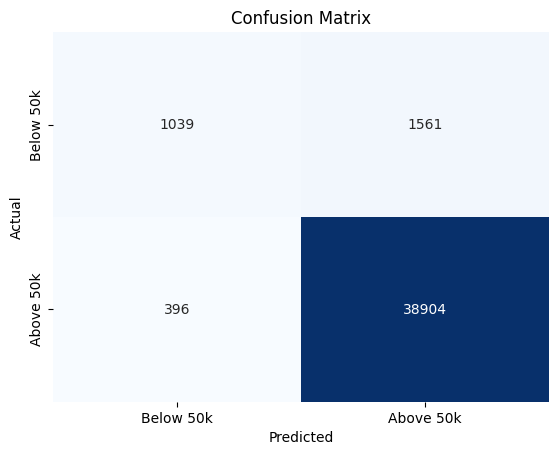

In [ ]:
conf_matrix=confusion_matrix(y_test,rdf_pred)
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',cbar=False,
            xticklabels=['Below 50k','Above 50k'],
            yticklabels=['Below 50k','Above 50k'],
            )
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The RandomForest model's evaluation results show strong overall performance with high accuracy (95%). It excels in predicting class 1, demonstrated by high precision (96%), recall (99%), and F1-score (98%). However, there is room for improvement in predicting class 0, as indicated by lower precision (72%), recall (40%), and F1-score (51%). The macro-average metrics provide a balanced view across both classes, revealing areas for enhancement, while the weighted averages account for class distribution, emphasizing the model's effectiveness in the majority class. Consideration of these metrics aids in understanding and refining the model's predictive capabilities.

 #LogisticRegression

In [ ]:
log_reg =LogisticRegression()
log_reg.fit(X_train,y_train)
lg_pred=log_reg.predict(X_test)
print(classification_report(y_test,lg_pred))

              precision    recall  f1-score   support

           0       0.70      0.39      0.50      2600
           1       0.96      0.99      0.97     39300

    accuracy                           0.95     41900
   macro avg       0.83      0.69      0.74     41900
weighted avg       0.94      0.95      0.95     41900



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



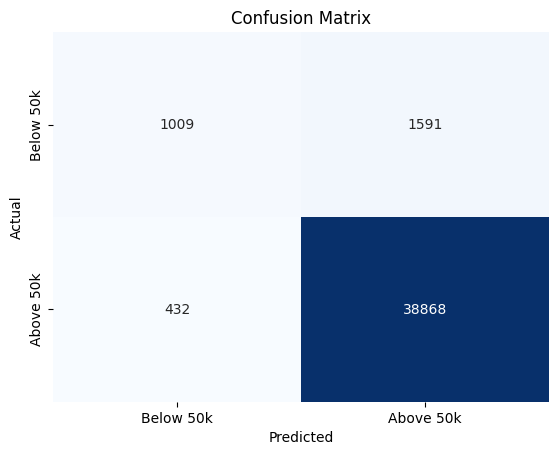

In [ ]:
conf_matrix=confusion_matrix(y_test,lg_pred)
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',cbar=False,
            xticklabels=['Below 50k','Above 50k'],
            yticklabels=['Below 50k','Above 50k'],
            )
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The Logistic Regression model demonstrates strong overall performance, achieving an accuracy of 95%. Class 1 predictions exhibit high precision (96%), recall (99%), and F1-score (97%), indicating excellent identification of this majority class. However, Class 0 predictions show lower precision (70%) and recall (39%), suggesting challenges in accurately identifying instances of this minority class.

#SVC

In [ ]:
svc=SVC(random_state=42)
svc.fit(X_train,y_train)
svc_pred=svc.predict(X_test)
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.77      0.34      0.47      2600
           1       0.96      0.99      0.98     39300

    accuracy                           0.95     41900
   macro avg       0.86      0.67      0.72     41900
weighted avg       0.95      0.95      0.94     41900



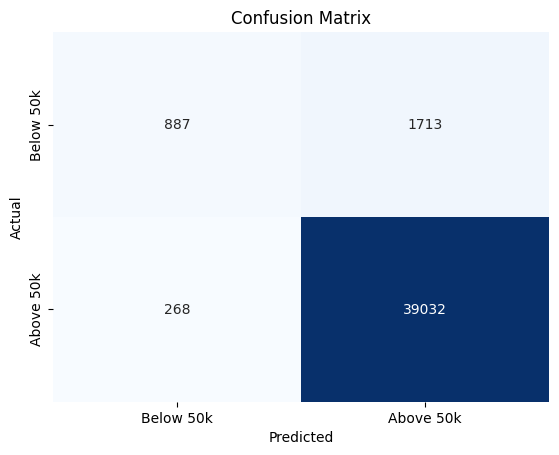

In [ ]:
conf_matrix=confusion_matrix(y_test,svc_pred)
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',cbar=False,
            xticklabels=['Below 50k','Above 50k'],
            yticklabels=['Below 50k','Above 50k'],
            )
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

SVC model, an overall accuracy of 95% is achieved. Class 1 predictions demonstrate high precision (96%), recall (99%), and F1-score (98%), indicating excellent identification of the majority class. However, Class 0 predictions show lower precision (77%) and recall (34%), suggesting challenges in accurately identifying instances of the minority class..

#GradientBoostingClassifier

In [ ]:
gboost=GradientBoostingClassifier(random_state=42)
gboost.fit(X_train,y_train)
gb_pred=gboost.predict(X_test)
print(classification_report(y_test,gb_pred))

              precision    recall  f1-score   support

           0       0.74      0.41      0.53      2600
           1       0.96      0.99      0.98     39300

    accuracy                           0.95     41900
   macro avg       0.85      0.70      0.75     41900
weighted avg       0.95      0.95      0.95     41900



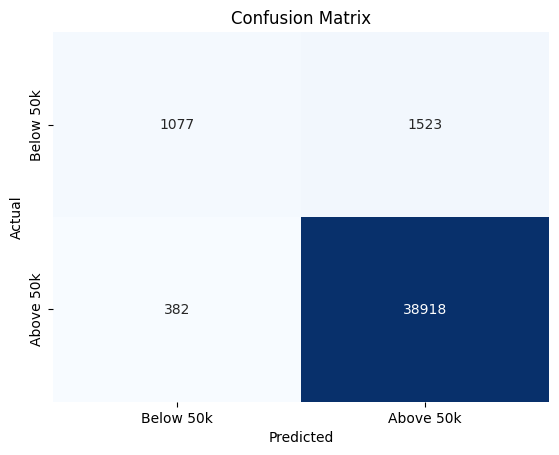

In [ ]:
conf_matrix=confusion_matrix(y_test,gb_pred)
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',cbar=False,
            xticklabels=['Below 50k','Above 50k'],
            yticklabels=['Below 50k','Above 50k'],
            )
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The GradientBoostingClassifier demonstrates strong classification performance, achieving an overall accuracy of 95%. Class 1 predictions exhibit high precision (96%), recall (99%), and F1-score (98%), indicating excellent identification of the majority class. Class 0 predictions show respectable precision (74%) and recall (41%). The macro-average metrics provide a balanced overview, with an average precision of 85%, recall of 70%, and F1-score of 75%.

#KNeighborsClassifier

In [ ]:
neighbors=KNeighborsClassifier()
neighbors.fit(X_train,y_train)
ng_pred=neighbors.predict(X_test)
print(classification_report(y_test,ng_pred))

              precision    recall  f1-score   support

           0       0.60      0.37      0.46      2600
           1       0.96      0.98      0.97     39300

    accuracy                           0.95     41900
   macro avg       0.78      0.68      0.72     41900
weighted avg       0.94      0.95      0.94     41900



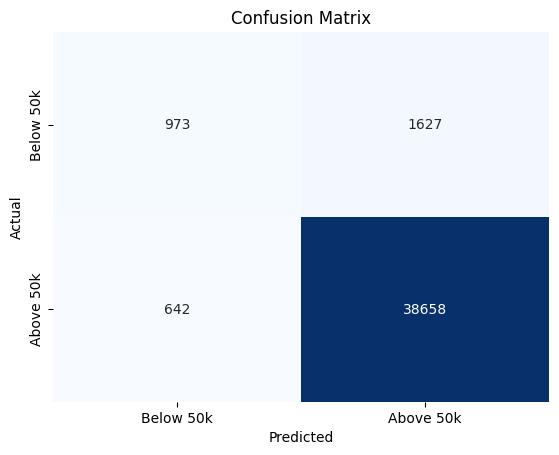

In [ ]:
conf_matrix=confusion_matrix(y_test,ng_pred)
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',cbar=False,
            xticklabels=['Below 50k','Above 50k'],
            yticklabels=['Below 50k','Above 50k'],
            )
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The KNeighborsClassifier model exhibits an overall accuracy of 95%. Class 1 predictions demonstrate strong performance with high precision (96%), recall (98%), and F1-score (97%). However, Class 0 predictions show lower precision (60%) and recall (37%), indicating challenges in accurately identifying instances of the minority class.

#DecisionTreeClassifier

In [ ]:
decision_tree=DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train,y_train)
dt_pred=decision_tree.predict(X_test)
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.46      0.50      0.48      2600
           1       0.97      0.96      0.96     39300

    accuracy                           0.93     41900
   macro avg       0.72      0.73      0.72     41900
weighted avg       0.94      0.93      0.93     41900



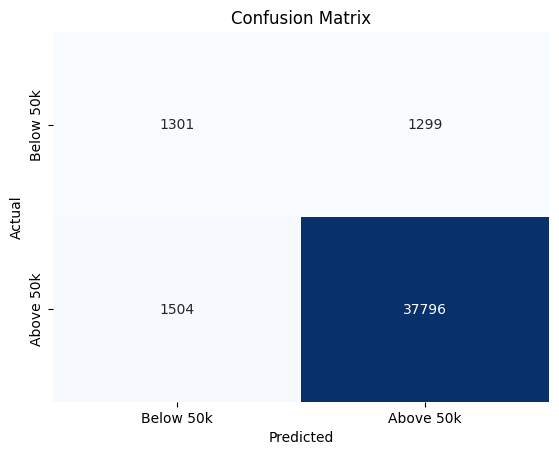

In [ ]:
conf_matrix=confusion_matrix(y_test,dt_pred)
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',cbar=False,
            xticklabels=['Below 50k','Above 50k'],
            yticklabels=['Below 50k','Above 50k'],
            )
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The DecisionTreeClassifier model achieves an overall accuracy of 93%. Class 1 predictions demonstrate strong performance with high precision (97%), recall (96%), and F1-score (96%). However, Class 0 predictions show lower precision (46%) and recall (50%), suggesting challenges in accurately identifying instances of the minority class. The macro-average metrics present a balanced view, with an average precision, recall, and F1-score of 72%. The weighted averages, considering class distribution, indicate the model's overall effectiveness with scores of 94% across precision, recall, and F1-score.

# Hyper Tuning

The models above do not perform well the Class 0 (Below_50k), we want to tune some of the models to get the best estimator. We tuned the following models


* LogisticRegression
* Random Forest Classifier
* Gradient Boosting Classifier
* K-Nearest Neighbors Classifier
* Support Vector Classifier




In [ ]:

# List of models to tune
models_to_tune = [
    ('Logistic Regression', LogisticRegression(), {'C': [0.001, 0.01, 0.1, 1, 10, 100]}),
    ('Random Forest', RandomForestClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}),
    ('Gradient Boosting', GradientBoostingClassifier(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}),
    ('K-Nearest Neighbors', KNeighborsClassifier(), {'n_neighbors': [3, 5, 7, 9]}),
    ('Support Vector Classifier', SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
]

# Perform hyperparameter tuning for each model
for model_name, model, param_grid in models_to_tune:
    print(f"Performing hyperparameter tuning for {model_name}...")

    # Create GridSearchCV object
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')

    # Fit the GridSearchCV object to the training data
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters
    best_params = grid_search.best_params_
    print(f"Best Hyperparameters for {model_name}: {best_params}")

    # Evaluate the model on the validation set using the best hyperparameters
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_val)

    # Print classification report
    print(f"Classification Report on Validation Set for {model_name}:")
    print(classification_report(y_val, y_pred))
    print("\n")
